<h1 style="text-align:center; color:#87CEEB; font-size:48px;">Titanic - Machine Learning from Disaster</h1>

https://www.kaggle.com/code/baseershah/titanic-voting-classifier-tutorial/input?select=train.csv

<h3 style="color:#87CEEB; font-size:30px;">Pre-Requisites</h3>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,  ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os

<h3 style="color:#87CEEB; font-size:30px;">LOAD DATASET</h3>

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
X = train.copy()
y = X.pop('Survived')

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h3 style="color:#87CEEB; font-size:30px;">EDA + PREPROCESSING</h3>


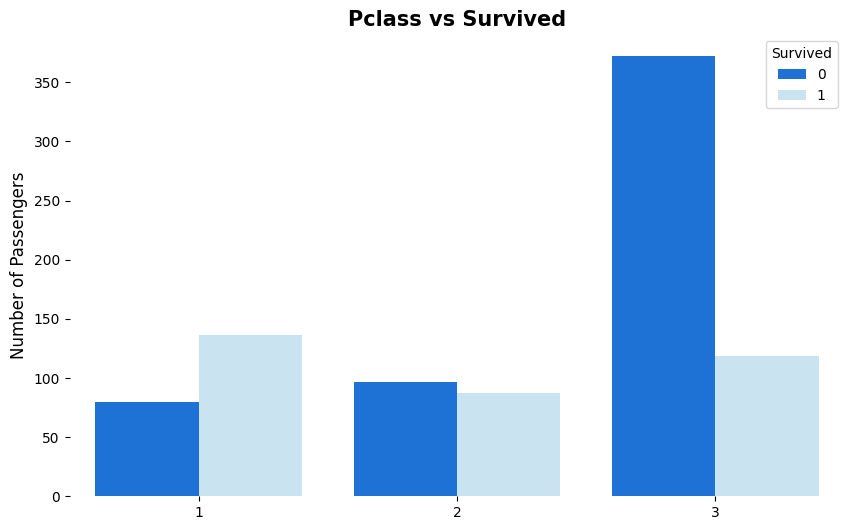

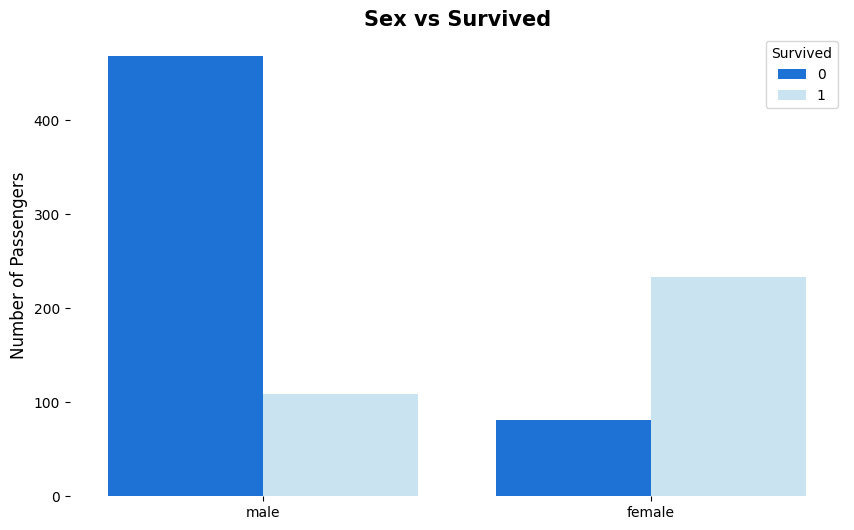

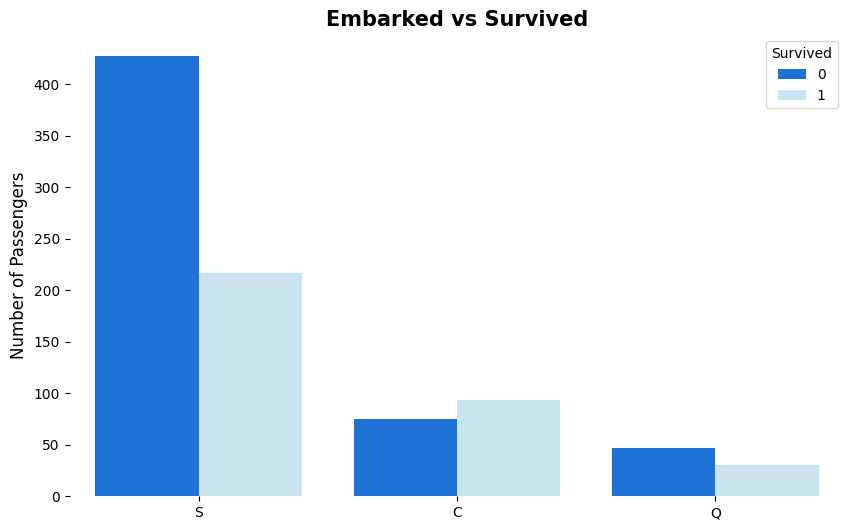

In [5]:
train = train.replace([np.inf, -np.inf], np.nan)
categorical_features = ['Pclass', 'Sex', 'Embarked']
colors = ['#0070f3', '#c4e5f6']
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, hue='Survived', data=train, palette=colors)
    plt.title(f'{feature} vs Survived', fontsize=15, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Number of Passengers', fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.show()

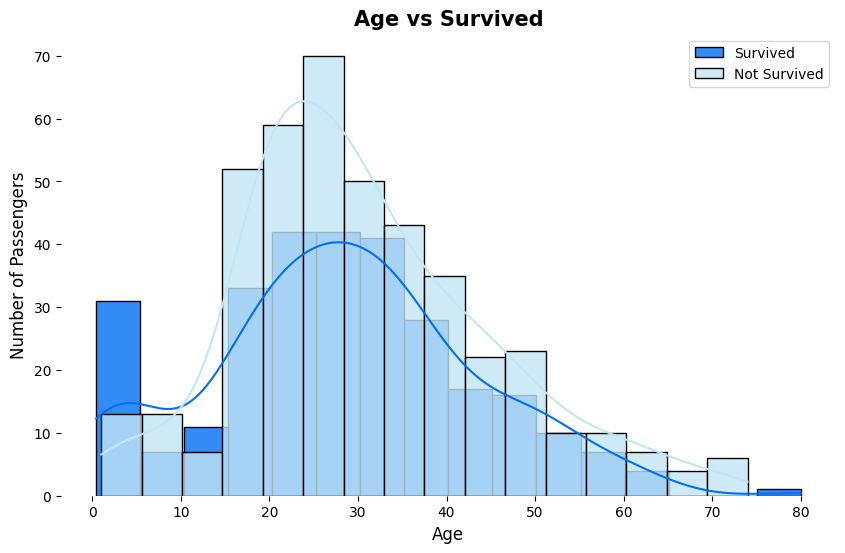

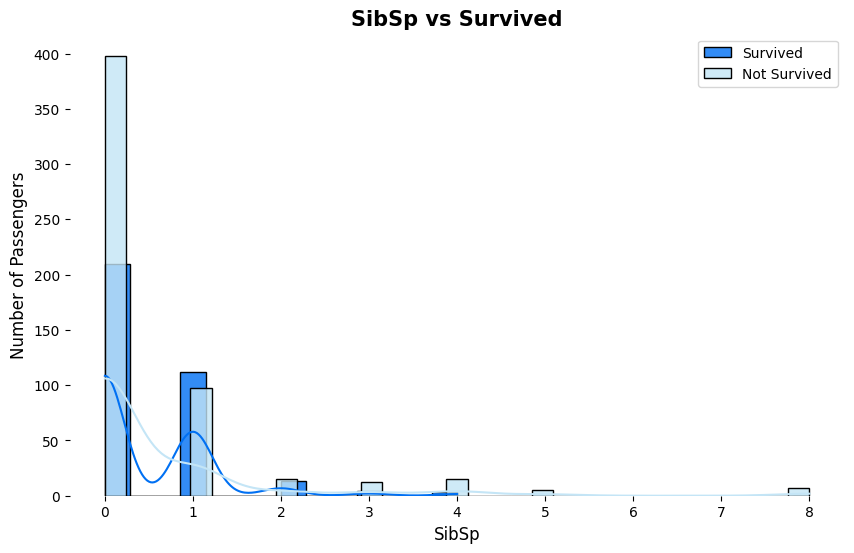

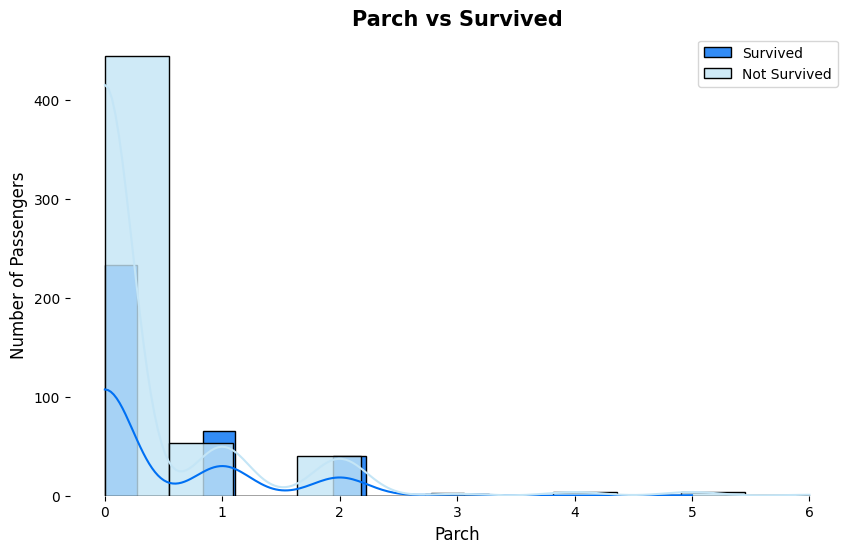

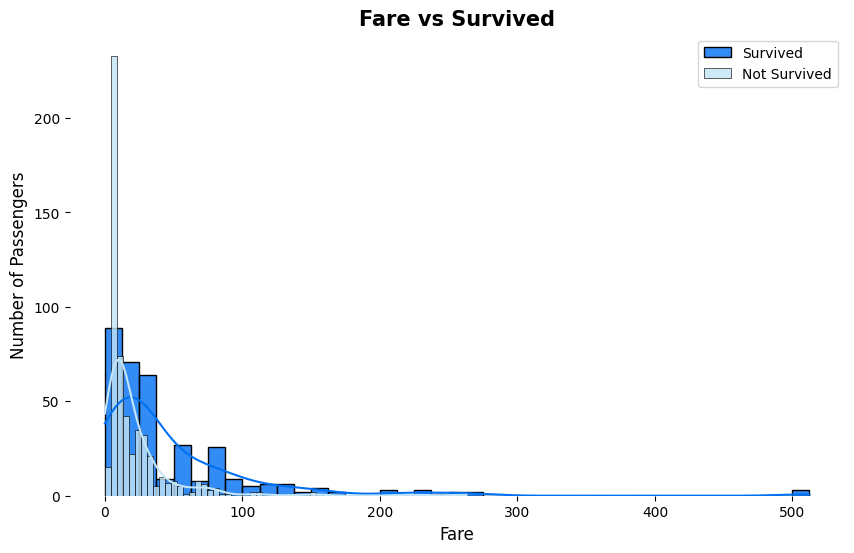

In [6]:
import warnings
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
colors = ['#0070f3', '#c4e5f6']
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    for feature in numerical_features:
        plt.figure(figsize=(10,6))
        sns.histplot(train[train['Survived'] == 1][feature], kde=True, color=colors[0], label='Survived', alpha=0.8)
        sns.histplot(train[train['Survived'] == 0][feature], kde=True, color=colors[1], label='Not Survived', alpha=0.8)
        plt.title(f'{feature} vs Survived', fontsize=15, fontweight='bold')
        plt.xlabel(f'{feature}', fontsize=12)
        plt.ylabel('Number of Passengers', fontsize=12)
        plt.legend(loc='upper right')
        sns.despine(left=True, bottom=True)
        plt.show()

/Users/mike/.pyenv/versions/3.10.4/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


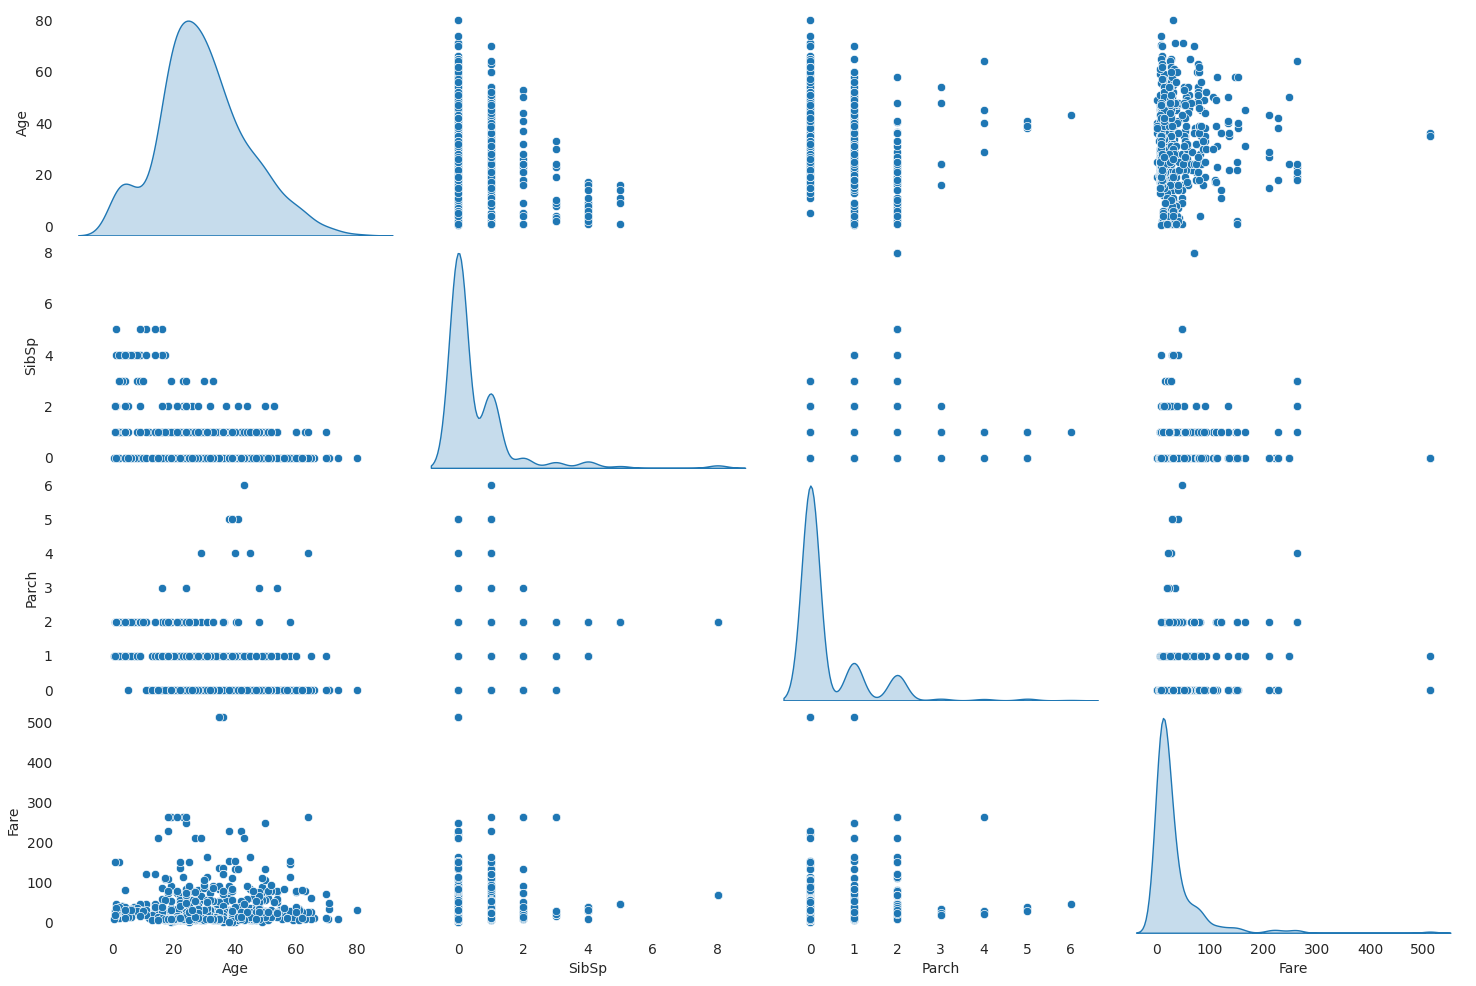

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    with sns.axes_style("white"):
        g = sns.pairplot(train, diag_kind='kde', markers=['o'], height=2.5, aspect=1.5, vars=numerical_features)
    sns.despine(left=True, bottom=True)
    plt.show()


In [8]:
X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
X.isnull().sum().to_frame()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [10]:
features = ['Pclass','Sex','SibSp','Parch','Age','Embarked']

In [11]:
mean = X['Age'].mean()
X['Age'] = X['Age'].fillna(mean)

In [12]:
X['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
X['Embarked'] = X['Embarked'].fillna('S')

In [14]:
X = X[features]
X = pd.get_dummies(X)

<h3 style="color:#87CEEB; font-size:30px;">TRAIN VOTING CLASSIFIER</h3>


In [15]:
xgbc = XGBClassifier(objective='binary:logistic', n_estimators=500, max_depth=6, learning_rate=0.1,
                      subsample=0.8, colsample_bytree=0.8, reg_alpha=10, random_state=1)
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1,                              criterion='gini', random_state=1)
dtc = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=1)
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1,
                                 subsample=0.8, criterion='friedman_mse', random_state=1)
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=1)
etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, min_samples_split=2,
                           min_samples_leaf=1, bootstrap=False, random_state=1)

In [16]:
voting = VotingClassifier(estimators=[('rfc',rfc),('dtc',dtc),('xgb',xgbc),
                                      ('etc', etc),('ada', ada),('gb',gbc)],voting='soft')


In [17]:
voting.fit(X,y)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=1)),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_me...
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=1, ...)),
                             ('etc',
                              ExtraTreesClassifier(max_depth=5,
                                                   random_state=1)),
                             ('ada', AdaBoostClassifier(random_state=1)),
                             ('gb',
                              GradientBoostingClassifier(random_state=1,
                                                         subsample=0.8))],
                 voting='soft')

<h3 style="color:#87CEEB; font-size:30px;">TEST PREPROCESSING</h3>

In [18]:
idx = test['PassengerId']

In [19]:
test.isnull().sum().to_frame()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [20]:
test_age_mean = test['Age'].mean()
test['Age'] = test['Age'].fillna(test_age_mean)

In [21]:
test = test[features]
test = pd.get_dummies(test)

<h3 style="color:#87CEEB; font-size:30px;">TEST PREDICTIONS + SUBMISSION</h3>


In [22]:
predictions_voting = voting.predict(test)
output = pd.DataFrame({'PassengerId':idx,'Survived':predictions_voting})
output.to_csv('submission.csv',index = False)
print("done")

done


In [23]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings

def load_and_preprocess_data(train_path, test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    X = train.copy()
    y = X.pop('Survived')
    features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Embarked']
    mean_age = X['Age'].mean()
    X['Age'] = X['Age'].fillna(mean_age)
    X['Embarked'] = X['Embarked'].fillna('S')
    X = X[features]
    X = pd.get_dummies(X)
    return X, y, test

def train_voting_classifier(X, y):
    xgbc = XGBClassifier(objective='binary:logistic', n_estimators=500, max_depth=6, learning_rate=0.1,
                         subsample=0.8, colsample_bytree=0.8, reg_alpha=10, random_state=1)
    rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1,
                                 criterion='gini', random_state=1)
    dtc = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=1)
    gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1,
                                     subsample=0.8, criterion='friedman_mse', random_state=1)
    ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=1)
    etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, min_samples_split=2,
                               min_samples_leaf=1, bootstrap=False, random_state=1)
    voting = VotingClassifier(estimators=[('rfc', rfc), ('dtc', dtc), ('xgb', xgbc),
                                          ('etc', etc), ('ada', ada), ('gb', gbc)], voting='soft')
    voting.fit(X, y)
    return voting

def predict_and_submit(voting, test, idx):
    test_age_mean = test['Age'].mean()
    test['Age'] = test['Age'].fillna(test_age_mean)
    test = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Embarked']]
    test = pd.get_dummies(test)
    predictions_voting = voting.predict(test)
    output = pd.DataFrame({'PassengerId': idx, 'Survived': predictions_voting})
    output.to_csv('submission.csv', index=False)

def test_load_and_preprocess_data():
    X, y, test = load_and_preprocess_data("train.csv", "test.csv")
    assert X.shape[0] > 0, "Train data preprocessing failed"
    assert y.shape[0] > 0, "Target variable extraction failed"
    assert test.shape[0] > 0, "Test data preprocessing failed"

def test_train_voting_classifier():
    X, y, _ = load_and_preprocess_data("train.csv", "test.csv")
    voting = train_voting_classifier(X, y)
    assert voting is not None, "Voting classifier training failed"

def test_predict_and_submit():
    X, y, test = load_and_preprocess_data("train.csv", "test.csv")
    voting = train_voting_classifier(X, y)
    idx = test['PassengerId']
    predict_and_submit(voting, test, idx)
    assert os.path.exists('submission.csv'), "Submission file creation failed"

X, y, test = load_and_preprocess_data("train.csv", "test.csv")
voting = train_voting_classifier(X, y)
idx = test['PassengerId']
predict_and_submit(voting, test, idx)
test_load_and_preprocess_data()
test_train_voting_classifier()
test_predict_and_submit()
